In [1]:
from typing import List, Tuple
from abc import ABC, abstractmethod
from enum import Enum
import random

from tqdm import trange

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Shell:
    BLANK=0
    LIVE=1

In [3]:
class Play:
    HIMSELF=0
    OPPONENT=1

In [5]:
class Player(ABC):

    def __init__(self, life:int, name:str):
        self._life = life
        self._points = 0
        self._name = name

    @abstractmethod
    def play(self, bullets:List[Shell]) -> Play:
        """Think and then play"""
        pass

    def decrease_life(self):
        self._life -= 1

    def add_point(self):
        self._points += 1

    @property
    def name(self) -> str:
        return self._name

    @property
    def points(self) -> int:
        return self._points

    @property
    def life(self) -> int:
        return self._life

    @property
    def is_alive(self) -> bool:
        return self._life > 0

    def __str__(self):
        return self._name
    
    def __repr__(self):
        return self._name

In [6]:
class Game:
    def __init__(
        self,
        bullets: List[Shell],
        players: List[Player]
    ):
        self._bullets = bullets
        self._players = players

        self._rounds = 0

        self._total_players = len(players)
        self._current_player_i = 0

    def _get_next_player_i(self) -> int:
        return (self._current_player_i+1)%self._total_players

    @property
    def _opponent(self) -> Player:
        return self._players[self._get_next_player_i()]

    def _set_next_player(self):
        self._current_player_i = self._get_next_player_i()

    @property
    def _current_player(self) -> Player:
        return self._players[self._current_player_i]

    @property
    def _next_bullet(self) -> Shell:
        bullet = random.choice(self._bullets)
        self._bullets.remove(bullet)
        return bullet

    @property
    def _has_live_shells(self) -> bool:
        return self._bullets.count(Shell.LIVE) > 0

    @property
    def _both_players_are_alive(self) -> bool:
        return all([player.is_alive for player in self._players]) 

    @property
    def _has_ended(self) -> bool:
        return not self._has_live_shells or not self._both_players_are_alive

    @property
    def _winner(self) -> Player:
        return max(self._players, key=lambda p: p.points)


    def run(self, debug:bool=True) -> Tuple[Player, int]:
        while not self._has_ended:
            player = self._current_player
            play = player.play(self._bullets)
            bullet = self._next_bullet

            if(play == Play.HIMSELF and bullet == Shell.BLANK):
                if(debug): print("Player shot himself and it was blank")
                continue
            elif(play == Play.HIMSELF and bullet == Shell.LIVE):
                if(debug):print("Player shot himself and it was live (-1)")
                player.decrease_life()
                self._opponent.add_point()
            elif(play == Play.OPPONENT and bullet == Shell.BLANK):

                if(debug):
                    print("Player shot his opponent and it was blank")
                    print("Next player")
                self._set_next_player()
            elif(play == Play.OPPONENT and bullet == Shell.LIVE):
                if(debug):
                    print("Player shot his opponent and it was Live (+1)")
                    print("Next player")
                self._opponent.decrease_life()
                self._set_next_player()
            
            self._rounds += 1
        
        if(debug): print("End game!")

        return self._winner, self._rounds








In [7]:
class Human1(Player):
    def play(self, bullets:List[Shell]) -> Play:
        total_live = bullets.count(Shell.LIVE)
        prob_of_live_shell = total_live/len(bullets)

        if(prob_of_live_shell >= 0.5):
            return Play.OPPONENT
        return Play.HIMSELF

In [8]:
class Human2(Player):
    def play(self, bullets:List[Shell]) -> Play:
        return Play.OPPONENT

In [9]:
class Human3(Player):
    def play(self, bullets:List[Shell]) -> Play:
        if(random.random() <= 0.5):
            return Play.OPPONENT
        return Play.HIMSELF

In [15]:
class Human4(Player):
    def play(self, bullets:List[Shell]) -> Play:
        return Play.HIMSELF

In [10]:
class Dealer(Player):
    def play(self, bullets:List[Shell]) -> Play:
        if(random.random() <= 0.5):
            return Play.OPPONENT
        return Play.HIMSELF

In [16]:
data_first_strategy = pd.DataFrame(columns=["winner", "rounds"])
data_second_strategy = pd.DataFrame(columns=["winner", "rounds"])
data_third_strategy = pd.DataFrame(columns=["winner", "rounds"])
data_forth_strategy = pd.DataFrame(columns=["winner", "rounds"])

In [12]:
TOTAL_RUNS = 100000

In [18]:
for human_player,df in zip((Human1, Human2, Human3, Human4), (data_first_strategy, data_second_strategy, data_third_strategy, data_forth_strategy)):
    for run in trange(TOTAL_RUNS):
        game = Game([Shell.BLANK, Shell.BLANK, Shell.LIVE], [human_player(2, "player"), Dealer(2, "dealer")])
        winner,rounds = game.run(debug=False)
        df.loc[run] = {"winner":winner.name, "rounds":rounds}

100%|██████████| 100000/100000 [02:58<00:00, 559.32it/s]


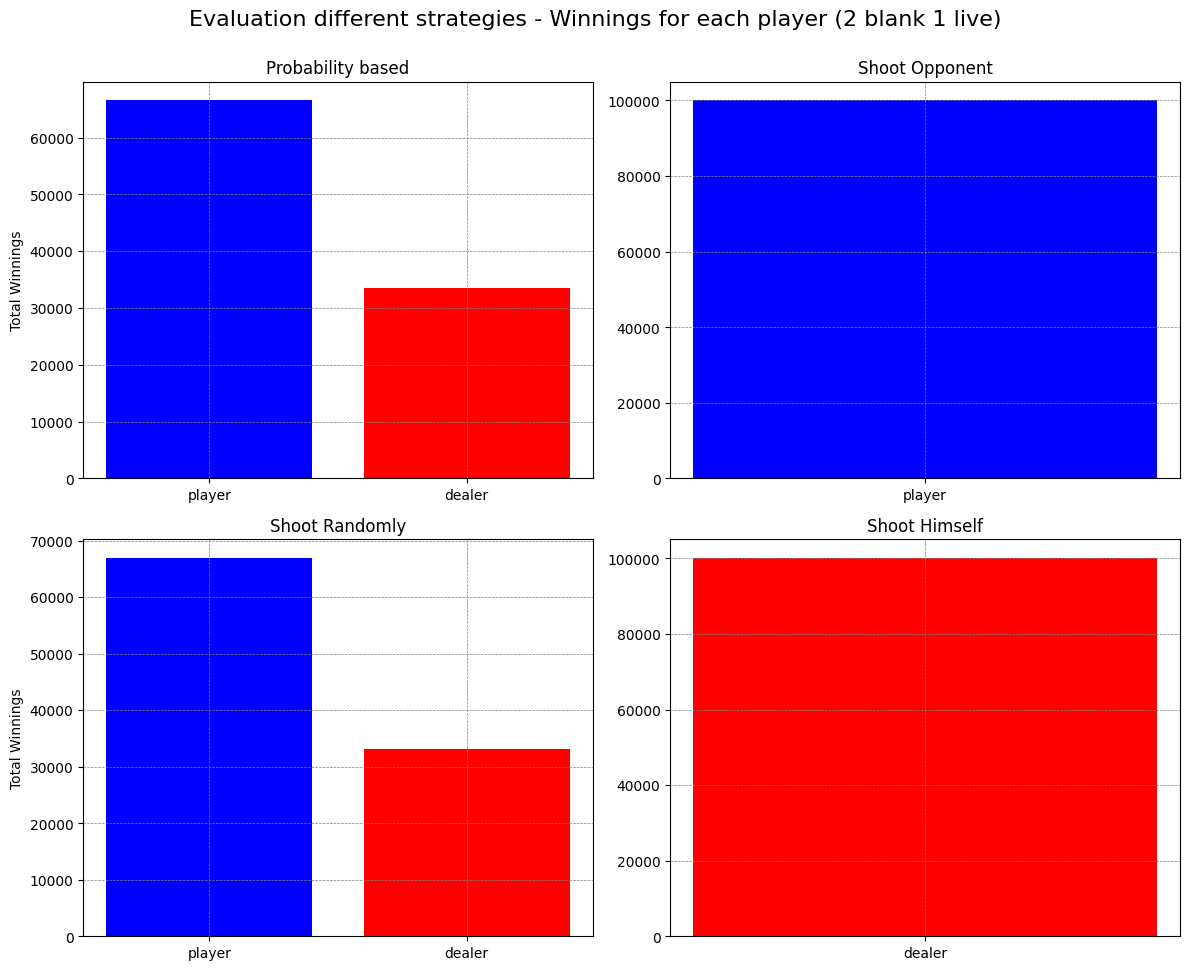

In [58]:
colors = {
    'player':'blue',
    'dealer':'red'
}

plt.figure(figsize=(12,14))
plt.suptitle("Evaluation different strategies - Winnings for each player (2 blank 1 live)", y=1, fontsize=16)

for i, (df, strategy_name) in enumerate(zip((data_first_strategy, data_second_strategy, data_third_strategy, data_forth_strategy), ("Probability based", "Shoot Opponent", "Shoot Randomly", "Shoot Himself"))):
    df.to_csv("%s.csv"%(strategy_name))
    values = df['winner'].value_counts().to_dict()

    plt.subplot(3,2,i+1)
    plt.title(strategy_name)

    bar_labels = list(values.keys())
    bar_colors = [ colors[label] for label in bar_labels ]

    if(i%2 == 0):
        plt.ylabel("Total Winnings")

    plt.grid(color='gray', linestyle='--', linewidth=0.5, which='both')
    plt.bar(height=values.values(), x=values.keys(), label=bar_labels, color=bar_colors)

plt.tight_layout()
plt.savefig("2-blank-1-live-sim.png",bbox_inches="tight")
plt.show()

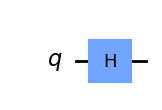

In [2]:
player = QuantumCircuit(1, name="Player")
player.h(0)
player.draw('mpl', style="clifford")

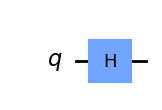

In [3]:
dealer = QuantumCircuit(1, name="Dealer")
dealer.h(0)
player.draw('mpl', style="clifford")

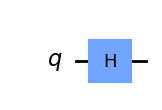

In [4]:
gun = QuantumCircuit(1, name="shoot")
gun.h(0)
gun.draw('mpl', style='clifford')

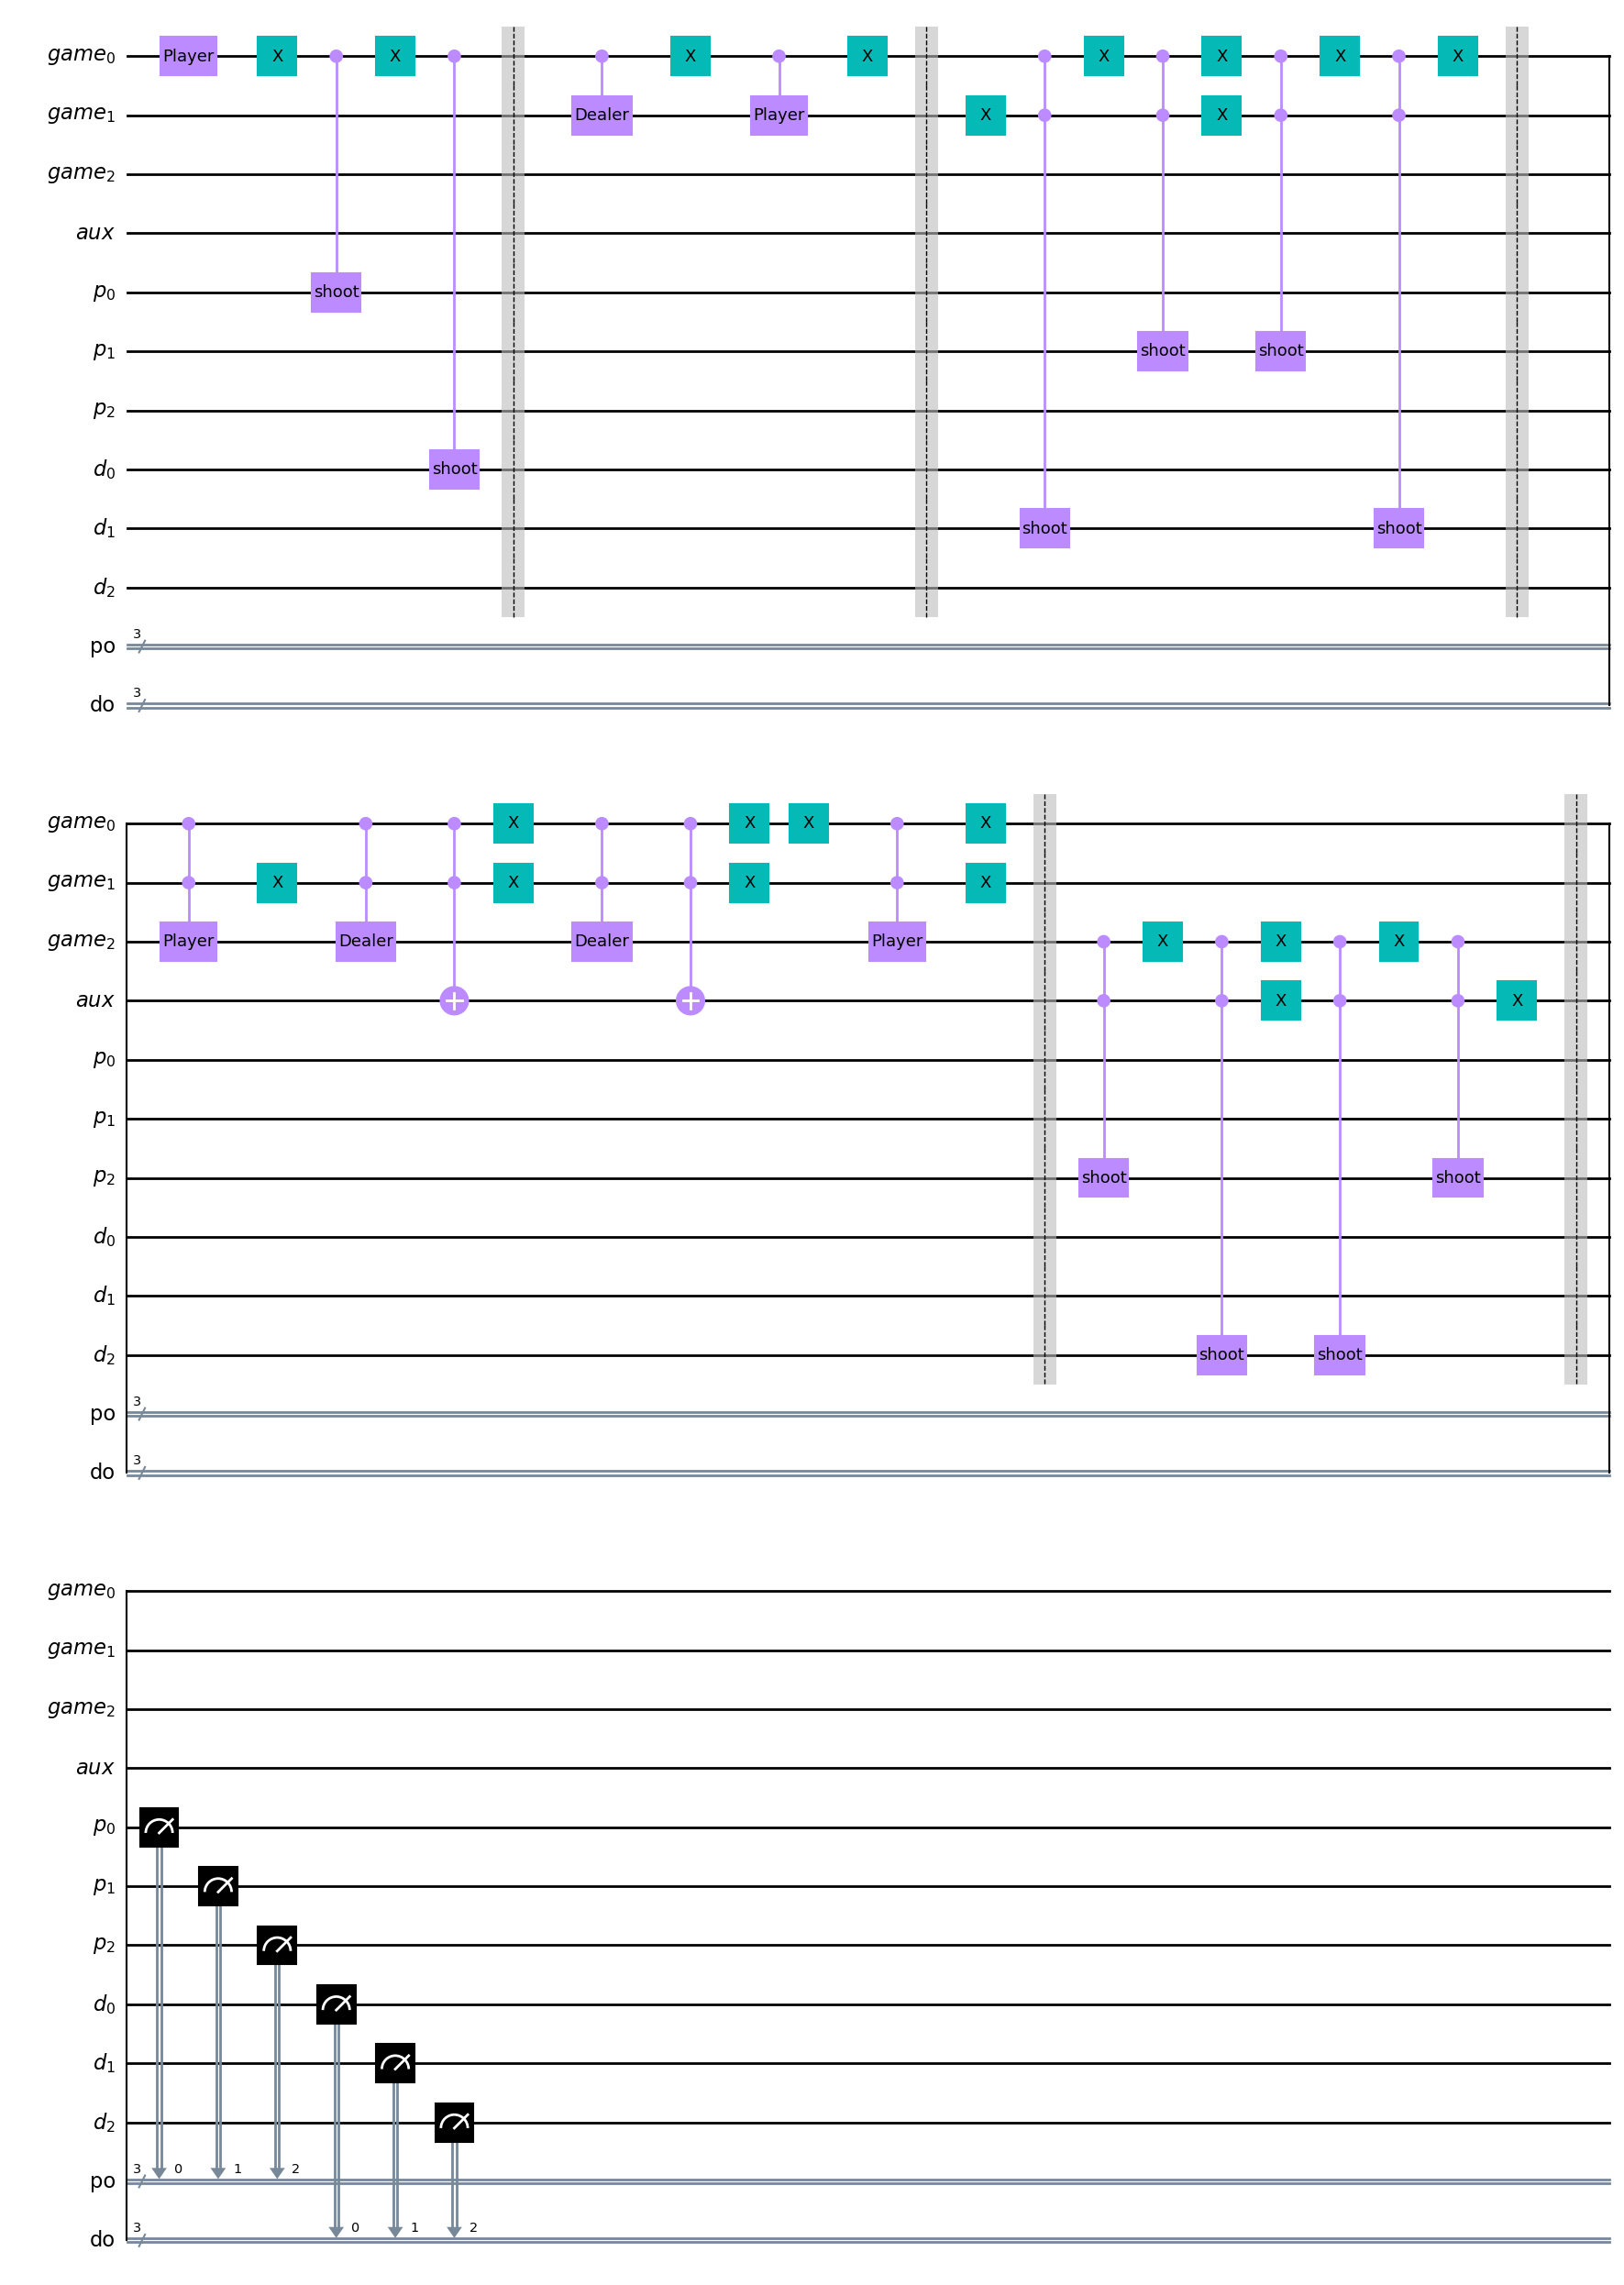

In [5]:
def buckshot_roulette(player, dealer, gun):
    player_gate = player.to_gate()
    player_controlled_gate = player.to_gate().control(1)
    player_two_controlled_gate = player.to_gate().control(2)
    
    dealer_controlled_gate = dealer.to_gate().control(1)
    dealer_two_controlled_gate = dealer.to_gate().control(2)
    
    gun_controlled_gate = gun.to_gate().control(1)
    gun_two_controlled_gate = gun.to_gate().control(2)
    
    player_life  = QuantumRegister(3, name="p") 
    dealer_life  = QuantumRegister(3, name="d")
    game = QuantumRegister(3, name="game")
    player_life_out = ClassicalRegister(3, name="po")
    dealer_life_out = ClassicalRegister(3, name="do")
    aux = AncillaRegister(1, name="aux")
    
    qc = QuantumCircuit(game, aux, player_life, dealer_life, player_life_out, dealer_life_out)
    
    qc.append(player.copy(), [game[0]])
    qc.x(game[0])
    qc.append(gun_controlled_gate.copy(), [game[0], player_life[0]])
    qc.x(game[0])
    qc.append(gun_controlled_gate.copy(), [game[0], dealer_life[0]])
    
    #next_player
    # 0 = player, 1 = dealer
    
    qc.barrier()
    
    qc.append(dealer_controlled_gate, [game[0], game[1]])
    qc.x(game[0])
    qc.append(player_controlled_gate, [game[0], game[1]])
    qc.x(game[0])
    qc.barrier()
    
    qc.x(game[1])
    qc.append(gun_two_controlled_gate, [game[0], game[1], dealer_life[1]])
    qc.x(game[0])
    qc.append(gun_two_controlled_gate, [game[0], game[1], player_life[1]])
    qc.x(game[0])
    
    qc.x(game[1])
    qc.append(gun_two_controlled_gate, [game[0], game[1], player_life[1]])
    qc.x(game[0])
    qc.append(gun_two_controlled_gate, [game[0], game[1], dealer_life[1]])
    qc.x(game[0])
    
    qc.barrier()
    
    qc.append(player_two_controlled_gate, [game[0], game[1], game[2]])
    
    qc.x(game[1])
    qc.append(dealer_two_controlled_gate, [game[0], game[1], game[2]])
    qc.ccx(game[0], game[1], aux)
    qc.x(game[1])
    
    qc.x(game[0])
    qc.append(dealer_two_controlled_gate, [game[0], game[1], game[2]])
    qc.ccx(game[0], game[1], aux)
    qc.x(game[0])
    
    qc.x([game[0], game[1]])
    qc.append(player_two_controlled_gate, [game[0], game[1], game[2]])
    qc.x([game[0], game[1]])
    qc.barrier()
    
    qc.append(gun_two_controlled_gate, [aux, game[2], player_life[2]])
    qc.x(game[2])
    qc.append(gun_two_controlled_gate, [aux, game[2], dealer_life[2]])
    qc.x(game[2])
    qc.x(aux)
    qc.append(gun_two_controlled_gate, [aux, game[2], dealer_life[2]])
    qc.x(game[2])
    qc.append(gun_two_controlled_gate, [aux, game[2], player_life[2]])
    qc.x(aux)
    
    
    qc.barrier()
    qc.measure(player_life, player_life_out)
    qc.measure(dealer_life, dealer_life_out)
    
    return qc


qc = buckshot_roulette(player, dealer, gun)
qc.draw('mpl', style="clifford", filename=get_image_path("quantum_buckshot_roulette.png"))

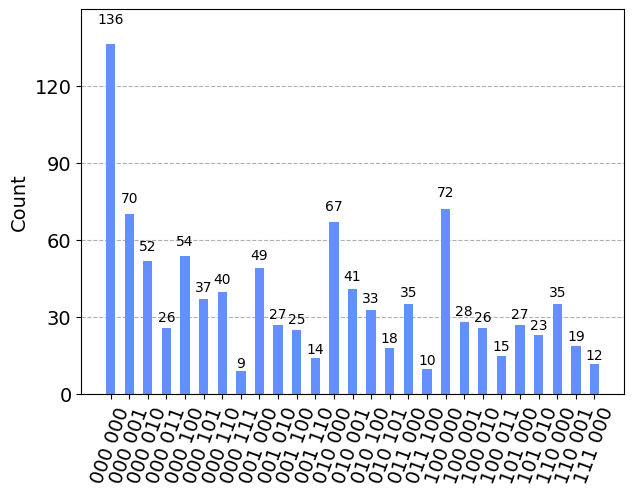

In [21]:
sim = AerSimulator()
transpiled_qc = transpile(buckshot_roulette(player, dealer, gun), sim)
result = sim.run(transpiled_qc, shots=1000).result().get_counts()
plot_histogram(result)

In [11]:
def parse_results(results):
    wins = {'dealer':0, 'player':0}
    for d,v in results.items():
        #v_bin = f"{v:06b}"
        if(d.count("1") > 3):
            continue
        
        bin_dealer, bin_player = d[:3], d[4:]

        #first_match
        first_dealer, first_player = bin_dealer[-1], bin_player[-1]
        #second_match
        second_dealer, second_player = bin_dealer[-2], bin_player[-2]
        #third_match
        third_dealer, third_player = bin_dealer[-3], bin_player[-3]

        if(first_dealer != first_player):
            winner = "dealer" if first_dealer == '0' else "player"
            wins[winner]+=v
            continue
            
        if(second_dealer != second_player):
            winner = "dealer" if second_dealer == '0' else "player"
            wins[winner]+=v
            continue
            
        if(third_dealer != third_player):
            winner = "dealer" if third_dealer == '0' else "player"
            wins[winner]+= v
            continue
        
    return wins    
parse_results(result)

{'dealer': 157, 'player': 705}

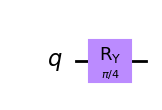

In [23]:
player_2 = QuantumCircuit(1)
player_2.ry(np.pi/4, 0)
player_2.draw('mpl', style='clifford')

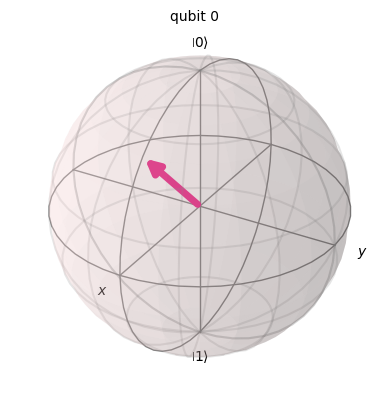

In [24]:
plot_bloch_multivector(player_2)

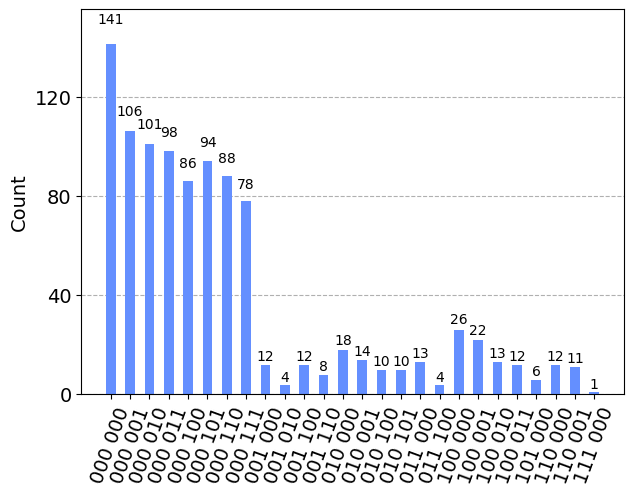

In [25]:
sim = AerSimulator()
transpiled_qc = transpile(buckshot_roulette(player_2, dealer, gun), sim)
result = sim.run(transpiled_qc, shots=1000).result().get_counts()
plot_histogram(result)

In [26]:
parse_results(result)

{'dealer': 733, 'player': 126}

In [27]:
def obj(x, sim, shots):
    player_var = QuantumCircuit(1)
    theta = Parameter('theta')
    phi = Parameter('phi')
    lam = Parameter('lambda')
    
    player_var.u(theta, phi, lam, 0)

    player_var = player_var.assign_parameters({theta:x[0], phi:x[1], lam:x[2]})
    qc = buckshot_roulette(player_var, dealer, gun)
    
    transpiled_qc = transpile(qc, sim)
    result = sim.run(transpiled_qc, shots=shots).result().get_counts()
    
    parsed_result = parse_results(result)
    print(parsed_result, x)
    return parsed_result['dealer']

minimized = minimize(
    x0=[0, 0, 0],
    bounds=[(0, np.pi), (0, 2*np.pi), (0,None)],
    fun=obj, 
    args=(AerSimulator(), 1000),
    method="COBYLA")
minimized

/home/alexandre/.asdf/installs/python/miniconda3-4.7.12/envs/quantum-oracles/lib/python3.8/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


{'dealer': 873, 'player': 0} [0. 0. 0.]
{'dealer': 636, 'player': 235} [1. 0. 0.]
{'dealer': 642, 'player': 233} [1. 1. 0.]
{'dealer': 643, 'player': 235} [1. 0. 1.]
{'dealer': 295, 'player': 568} [ 1.99924421 -0.02529732 -0.02951354]
{'dealer': 146, 'player': 729} [ 2.9988787  -0.0428914  -0.05003996]
{'dealer': 176, 'player': 685} [ 3.45511812 -0.67050235 -0.68087282]
{'dealer': 150, 'player': 732} [ 2.99989536 -0.39698024  0.3029757 ]
{'dealer': 224, 'player': 636} [3.80405673 0.40581615 0.3377098 ]
{'dealer': 199, 'player': 675} [ 2.50508955 -0.05822342 -0.12709319]
{'dealer': 168, 'player': 697} [ 3.10129312 -0.19992761 -0.21542108]
{'dealer': 164, 'player': 708} [3.13581296 0.1133484  0.08902166]
{'dealer': 173, 'player': 719} [ 2.87510747 -0.02717763 -0.04237451]
{'dealer': 154, 'player': 709} [ 3.00106597e+00 -2.44432521e-03 -9.76372342e-02]
{'dealer': 170, 'player': 693} [ 3.07324885 -0.14244949 -0.0635406 ]
{'dealer': 159, 'player': 726} [ 3.02505229 -0.00845271 -0.0049271 ]


 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 157.0
       x: [ 3.022e+00 -6.190e-02 -5.920e-02]
    nfev: 37
   maxcv: 0.0

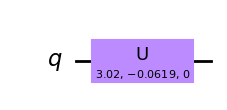

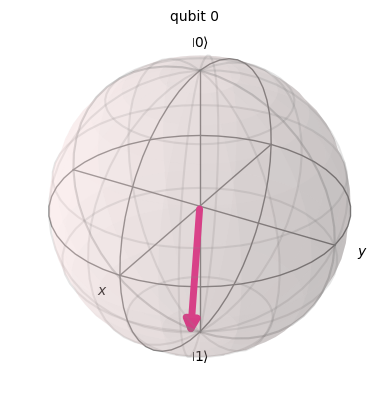

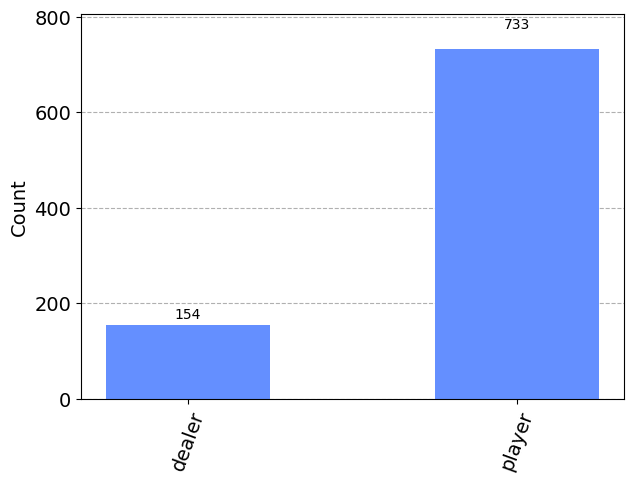

In [28]:
player_optimal = QuantumCircuit(1)
player_optimal.u(minimized.x[0], minimized.x[1],0, 0)
display(player_optimal.draw('mpl', style='clifford'))
qc = buckshot_roulette(player_optimal, dealer, gun)
transpiled_qc = transpile(qc, sim)
result = sim.run(transpiled_qc, shots=1000).result().get_counts()
display(plot_bloch_multivector(player_optimal))
plot_histogram(parse_results(result))

In [29]:
def obj(x, sim, shots):
    player_var = QuantumCircuit(1)
    theta = Parameter('theta')
    player_var.ry(theta, 0)
    player_var = player_var.assign_parameters({theta:x})
    qc = buckshot_roulette(player_var, dealer, gun)
    
    transpiled_qc = transpile(qc, sim)
    result = sim.run(transpiled_qc, shots=shots).result().get_counts()
    
    parsed_result = parse_results(result)
    print(parsed_result, x)
    return parsed_result['dealer']

def custom_minimizer(fun, args, **kwargs):
    bounds = kwargs['bounds']
    best_x = 0
    best_y = 100000
    rounds = 0
    
    for v in np.arange(bounds[0], bounds[1], 0.01):
        y = fun(v,args[0], args[1])
        if(y < best_y):
            best_y = y
            best_x = v
    
        rounds+=1
    print(best_x, best_y)

    return OptimizeResult(fun=best_y, x=best_x, nit=0, nfev=rounds, success=True)

minimized = minimize_scalar(
    fun=obj, 
    bounds=(0, 2*np.pi),
    args=(AerSimulator(), 1000),
    method=custom_minimizer)

minimized

{'dealer': 873, 'player': 0} 0.0
{'dealer': 876, 'player': 0} 0.01
{'dealer': 864, 'player': 0} 0.02
{'dealer': 867, 'player': 0} 0.03
{'dealer': 890, 'player': 0} 0.04
{'dealer': 867, 'player': 1} 0.05
{'dealer': 884, 'player': 0} 0.06
{'dealer': 875, 'player': 0} 0.07
{'dealer': 894, 'player': 3} 0.08
{'dealer': 882, 'player': 2} 0.09
{'dealer': 861, 'player': 0} 0.1
{'dealer': 875, 'player': 1} 0.11
{'dealer': 872, 'player': 3} 0.12
{'dealer': 861, 'player': 3} 0.13
{'dealer': 870, 'player': 7} 0.14
{'dealer': 847, 'player': 5} 0.15
{'dealer': 854, 'player': 11} 0.16
{'dealer': 874, 'player': 10} 0.17
{'dealer': 870, 'player': 7} 0.18
{'dealer': 847, 'player': 7} 0.19
{'dealer': 879, 'player': 8} 0.2
{'dealer': 868, 'player': 14} 0.21
{'dealer': 847, 'player': 13} 0.22
{'dealer': 848, 'player': 14} 0.23
{'dealer': 872, 'player': 14} 0.24
{'dealer': 880, 'player': 17} 0.25
{'dealer': 873, 'player': 20} 0.26
{'dealer': 855, 'player': 24} 0.27
{'dealer': 836, 'player': 24} 0.28
{'deale

 success: True
     fun: 121
       x: 3.25
     nit: 0
    nfev: 629

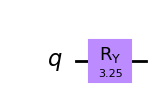

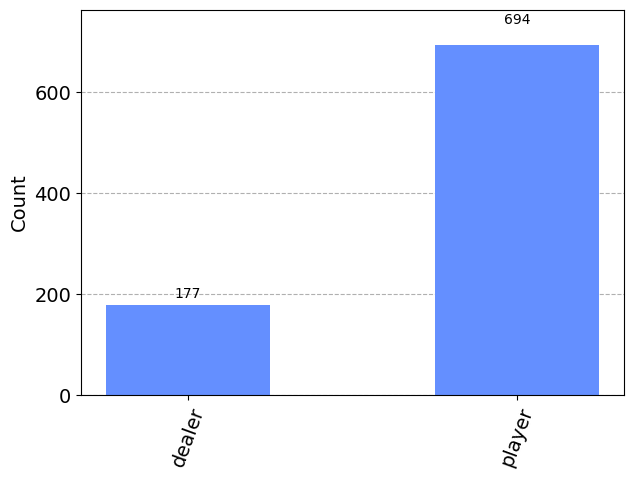

In [30]:
player_optimal = QuantumCircuit(1)
player_optimal.ry(minimized.x, 0)
display(player_optimal.draw('mpl', style='clifford'))
qc = buckshot_roulette(player_optimal, dealer, gun)
transpiled_qc = transpile(qc, sim)
result = sim.run(transpiled_qc, shots=1000).result().get_counts()
plot_histogram(parse_results(result))

In [31]:
def obj(x, sim, shots):
    player_var = QuantumCircuit(1)
    theta = Parameter('theta')
    phi = Parameter('phi')
    
    player_var.u(theta, phi, 0, 0)

    player_var = player_var.assign_parameters({theta:x[0], phi:x[1]})
    qc = buckshot_roulette(player_var, dealer, gun)
    
    transpiled_qc = transpile(qc, sim)
    result = sim.run(transpiled_qc, shots=shots).result().get_counts()
    
    parsed_result = parse_results(result)
    print(parsed_result, x)
    return parsed_result['dealer']

def custom_minimizer(fun, x0, args, **kwargs):
    bounds = kwargs['bounds']
    best_x = []
    best_y = 100000
    rounds = 0

    for i in np.arange(bounds[0][0], bounds[0][1], 0.1):
        for j in np.arange(bounds[1][0], bounds[1][1], 0.1):
            y = fun([i, j], args[0], args[1])
            if(y < best_y):
                best_y = y
                best_x = [i, j]
            
            rounds+=1
                
    print(best_x, best_y)

    return OptimizeResult(fun=best_y, x=best_x, nit=0, nfev=rounds, success=True)

minimized = minimize(
    x0=[0, 0],
    bounds=[(np.pi/4, np.pi), (np.pi/4, 2*np.pi)],
    fun=obj, 
    args=(AerSimulator(), 1000),
    method=custom_minimizer)
minimized

{'dealer': 719, 'player': 160} [0.7853981633974483, 0.7853981633974483]
{'dealer': 727, 'player': 147} [0.7853981633974483, 0.8853981633974483]
{'dealer': 714, 'player': 166} [0.7853981633974483, 0.9853981633974482]
{'dealer': 730, 'player': 138} [0.7853981633974483, 1.085398163397448]
{'dealer': 753, 'player': 119} [0.7853981633974483, 1.1853981633974482]
{'dealer': 748, 'player': 146} [0.7853981633974483, 1.2853981633974483]
{'dealer': 724, 'player': 144} [0.7853981633974483, 1.3853981633974481]
{'dealer': 715, 'player': 146} [0.7853981633974483, 1.485398163397448]
{'dealer': 744, 'player': 141} [0.7853981633974483, 1.585398163397448]
{'dealer': 725, 'player': 152} [0.7853981633974483, 1.6853981633974482]
{'dealer': 747, 'player': 134} [0.7853981633974483, 1.785398163397448]
{'dealer': 743, 'player': 146} [0.7853981633974483, 1.885398163397448]
{'dealer': 728, 'player': 154} [0.7853981633974483, 1.985398163397448]
{'dealer': 738, 'player': 143} [0.7853981633974483, 2.085398163397448]

 success: True
     fun: 117
       x: [3.0853981633974477, 3.7853981633974474]
     nit: 0
    nfev: 1320

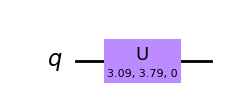

In [17]:
player_optimal = QuantumCircuit(1)
#player_optimal.u(minimized.x[0], minimized.x[1],0, 0)
player_optimal.u(3.0853981633974477, 3.7853981633974474,0, 0)
display(player_optimal.draw('mpl', style='clifford'))
plot_bloch_multivector(player_optimal, filename=get_image_path("player_optimal_strategy_bloch.png"))

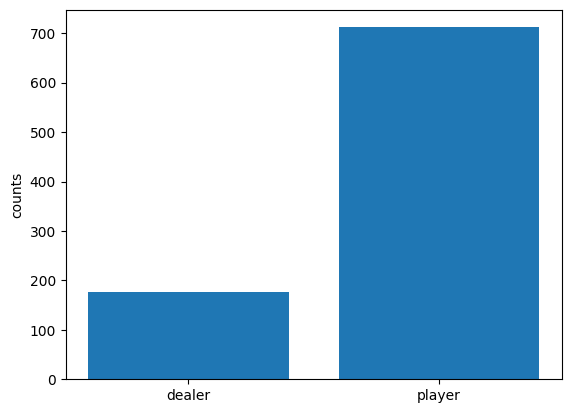

In [22]:
sim = AerSimulator()
qc = buckshot_roulette(player_optimal, dealer, gun)
transpiled_qc = transpile(qc, sim)
result = sim.run(transpiled_qc, shots=1000).result().get_counts()
parsed_results = parse_results(result)


plt.bar(x=['dealer', 'player'], height=list(parsed_results.values()))
plt.ylabel("counts")
plt.savefig(get_image_path("final_buckshot_roulette_quantum_optimal_strategy.png"))
plt.show()

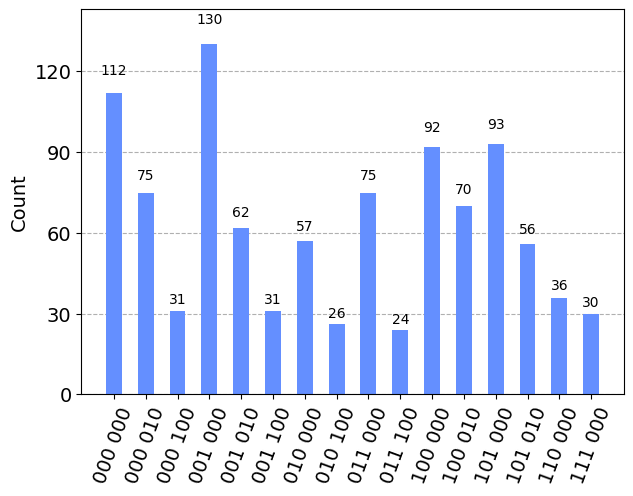

In [23]:
plot_histogram(result, filename=get_image_path("final_buckshot_roulette_quantum_optimal_strategy_bit_strings.png"))
plot_histogram(result)

In [24]:
transpiled = transpile(buckshot_roulette(player_optimal, dealer, gun), backend=Fake20QV1(), optimization_level=3)
transpiled.depth()

744

In [25]:
exp_result = Fake20QV1().run(transpiled, shots=1000).result().get_counts()
exp_result

{'000 111': 1,
 '110 001': 1,
 '011 101': 1,
 '001 101': 1,
 '100 011': 1,
 '111 111': 1,
 '010 101': 1,
 '010 011': 2,
 '001 011': 1,
 '001 001': 2,
 '101 101': 1,
 '110 100': 25,
 '011 111': 1,
 '011 011': 1,
 '100 101': 3,
 '111 110': 15,
 '001 110': 13,
 '100 100': 32,
 '011 010': 22,
 '110 101': 1,
 '111 000': 24,
 '011 000': 43,
 '101 000': 31,
 '010 100': 29,
 '011 001': 2,
 '000 000': 64,
 '010 000': 34,
 '100 110': 13,
 '000 110': 30,
 '111 010': 15,
 '101 110': 14,
 '001 010': 40,
 '010 010': 41,
 '011 110': 19,
 '100 010': 26,
 '110 010': 19,
 '111 100': 18,
 '011 100': 25,
 '010 110': 13,
 '110 110': 13,
 '000 010': 55,
 '110 000': 49,
 '100 000': 46,
 '101 010': 28,
 '101 100': 29,
 '000 100': 47,
 '001 000': 62,
 '001 100': 44,
 '111 101': 1}

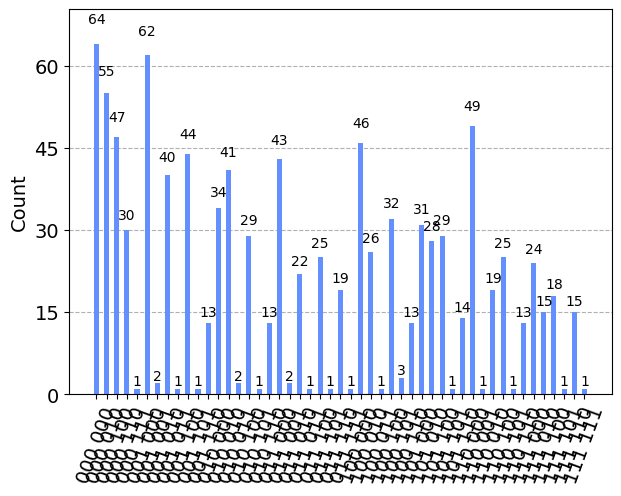

In [26]:
plot_histogram(exp_result, filename=get_image_path("final_buckshot_roulette_quantum_optimal_strategy_bit_strings_Fake20QV1.png"))
plot_histogram(exp_result)

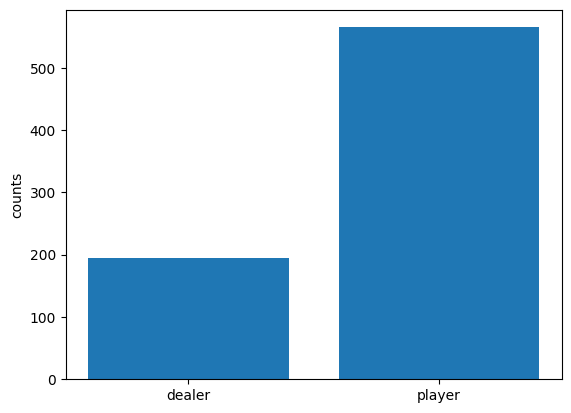

In [27]:
parsed_results = parse_results(exp_result)

plt.bar(x=['dealer', 'player'], height=list(parsed_results.values()))
plt.ylabel("counts")
plt.savefig(get_image_path("final_buckshot_roulette_quantum_optimal_strategy_Fake20QV1.png"))
plt.show()